# IMDB Review Classification using Word Embeddings(GloVe) #
<U>PROBLEM STATEMENT</U>:<BR>
In this project we will classify the IMDB reviews for positive and negative reviews using sentiment analysis or emotion AI.<BR>
    
What is Sentiment Analysis?<br>
In essence, it is the process of determining the emotional tone behind a series of words, used to gain an understanding of the<br>the attitudes, opinions and emotions expressed within an online mention.<br>
 
## What is IMDB?<br>
IMDb, also known as Internet Movie Database, is an online database of information related to world films, television programs,<br>home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot <br>summaries, trivia, and fan reviews and ratings

## How to perform Classification on Reviews using Sentiment Analysis?##

# Steps involved to perform sentiment analysis on given data set
## Step 1: Get some sentiment examples
IMDB review dataset is loaded<br>
## Step 2: Extract features from examples
Transform each example into a feature vector.<br>
Here we are using GloVe(Global Vectors) Word Embeddings for feature vectors.
## What is GloVe?
GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus.
<br>
## What are Word Embeddings?
In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text..
What word2vec does is, it updates the word vectors of a particular word by the probability of finding the word in the vicinity of the context words(i.e. The words around it).So the words which occur around same context words will have word vectors with much similarity.
Ex. ‘need’ and ‘required’ generally have the same context words around it and thus making them similar in meaning. So, the word vectors of ‘need’ and ‘required’ will be very much similar. 

In this project we will be using a variation of word2vec i.e. GloVe(Global Vectors for Word Representation by Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014).
We will use pre-trained word vectors in the project that is open sourced in the Stanford website.

## Step 3: Train the parameters
This is where your model will learn from the data. There are multiple ways of using features to generate an output, algorithms<br> used in this dataset are Logistic Regression,Naive Bayes, SVM and Decision Trees.<br>
## Step 4: Test the model 
After we have trained the parameters to fit the training data, we have to make sure our model generalizes to new data, because <br>it's really easy to overfit. The general way of regularizing the model is to prevent parameters from having extreme values.
and thus this model uses GridSearchCV model for hyperparameter tuning.
## Why GridSearchCV for Tuning?
GridSearchCV lets you combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal <br>parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from <br>the classifier, so yes, you can use the .score, .predict, etc.. methods directly through the GridSearchCV interface.
## Compare the Models and derive Observations

### lets follow the steps!###

import all necessary modules

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv("imdb_labelled11.csv")

## Data Visualization ##

In [99]:
df.head()

,Reviews,sentiments
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [101]:
df.describe(include='all')

,Reviews,sentiments
count,1000,997.000000
unique,997,NaN
top,Definitely worth checking out.,NaN
freq,2,NaN
mean,NaN,0.498495
std,NaN,0.500249
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [11]:
df.shape

(1000, 2)

### check for any missing value ###

In [102]:
df.isnull().values.any()

True

### need to repair ###

### Find mean ##
### impute the missing data with mean ###

In [3]:
df=df.fillna(df.mean())
df

,Reviews,sentiments
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0
5,"The rest of the movie lacks art, charm, meanin...",0.0
6,Wasted two hours.,0.0
7,Saw the movie today and thought it was a good ...,1.0
8,A bit predictable.,0.0
9,Loved the casting of Jimmy Buffet as the scien...,1.0


### Re-check for missing values### 

In [4]:
df.isnull().values.any()

False

### convert sentiments type to int from float for easy understanding ### 
### 0 -- Negative review
### 1 --Positive review

In [5]:
df['sentiments'] = df['sentiments'].apply(lambda x: int(x))
df['sentiments']

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      1
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
26     0
27     1
28     1
29     1
      ..
970    1
971    1
972    0
973    0
974    0
975    1
976    1
977    0
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    0
995    0
996    0
997    0
998    0
999    0
Name: sentiments, Length: 1000, dtype: int64

### Let's visualize data###
## EDA##

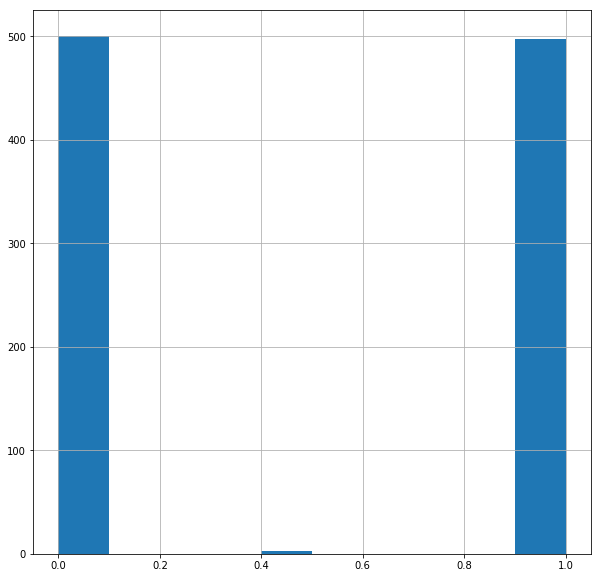

In [115]:
df['sentiments'].hist(figsize=(10,10))

negative reviews are slightly more than positive reviews.
which shows people are not satisfied.

### lets find out high frequecy of negative and positive words### 

In [6]:
reviews = df.Reviews.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(vocabulary)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

3420


['ends',
 'timeless',
 'Great',
 'treachery',
 'feel',
 'executed',
 'change',
 'Jonah',
 'after',
 'Regardless',
 'How',
 'Slideshow',
 'professor',
 'if',
 'whatsoever',
 'sick',
 'Started',
 'Meredith',
 'films',
 'Cinematography',
 'utter',
 'recover',
 'boobs',
 'Bela',
 'In',
 'i.e',
 'goes',
 'powerful',
 'yawn',
 'sheer',
 'splendid',
 'configuration',
 'everything-',
 'Toons',
 'special',
 'poetry',
 'super',
 'but',
 'are',
 'uninteresting',
 'horrible',
 'discovering',
 'wont',
 'thought-provoking',
 'oy-vey',
 'identifies',
 'ultra-cheap',
 'goalies',
 'dribble',
 'significant']

In [7]:
stop_words = set(stopwords.words('english'))
tokens = [w for w in vocabulary if w not in stop_words]
tokens

['ends',
 'timeless',
 'Great',
 'treachery',
 'feel',
 'executed',
 'change',
 'Jonah',
 'Regardless',
 'How',
 'Slideshow',
 'professor',
 'whatsoever',
 'sick',
 'Started',
 'Meredith',
 'films',
 'Cinematography',
 'utter',
 'recover',
 'boobs',
 'Bela',
 'In',
 'i.e',
 'goes',
 'powerful',
 'yawn',
 'sheer',
 'splendid',
 'configuration',
 'everything-',
 'Toons',
 'special',
 'poetry',
 'super',
 'uninteresting',
 'horrible',
 'discovering',
 'wont',
 'thought-provoking',
 'oy-vey',
 'identifies',
 'ultra-cheap',
 'goalies',
 'dribble',
 'significant',
 'volatile',
 'indoor',
 'Muppets',
 'glance',
 'LUCY',
 'campy',
 'girlfriend',
 'talent',
 'variation',
 'ball',
 'boost',
 'junk',
 'late',
 'feel-good',
 'showcasing',
 'Summary',
 'poorly',
 'riot',
 'coastal',
 'beautifully',
 'Watkins',
 'slow',
 'pitiful',
 'Ironically',
 'difference',
 'Pray',
 'behold',
 'legendary',
 'BEST',
 'remaining',
 'Marine',
 'pi**ed',
 'punish',
 'unintentionally',
 'lovely',
 'Regrettably',
 'S

In [8]:
def preprocess(raw_tweet, flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    if flag == 1:
        return(" ".join(words))
    else:
        return(len(words))

In [9]:
df['clean_text']=df['Reviews'].apply(lambda x: preprocess(x, flag=1))
df['Text_len']=df['Reviews'].apply(lambda x: preprocess(x, flag=2))

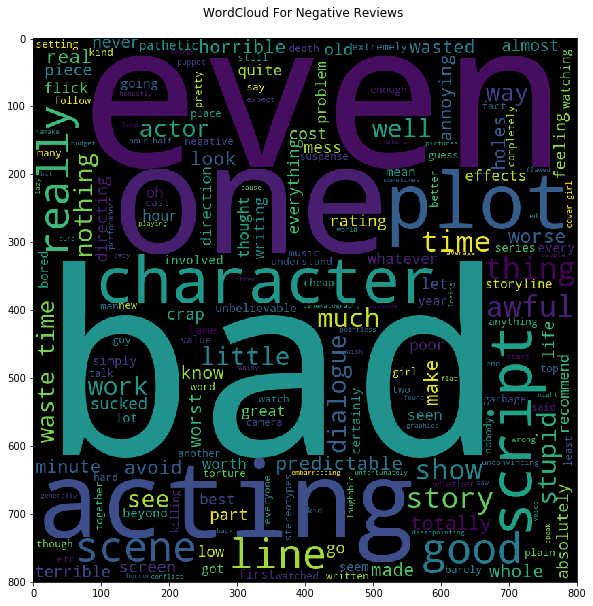

In [10]:
Neg=df[df['sentiments']==0]
Neg_Token=list()
for i in Neg['clean_text']:
    if 'movi' in i or 'film' in i:
        pass
    else:
        Neg_Token=Neg_Token+i.split(" ")
Neg_Corpus=" ".join(Neg_Token)
wordcloud=WordCloud(height=800,width=800,background_color='black').generate(Neg_Corpus)

plt.figure(figsize=(15,10))
plt.title("WordCloud For Negative Reviews \n")
plt.imshow(wordcloud)
plt.show()

### Highly used words in Negative reviews: ###
 1.bad<br>
 2.acting<br>
 3.even<br>
 4.script<br>
 5.plot<br>
 6.one<br>
 7.character

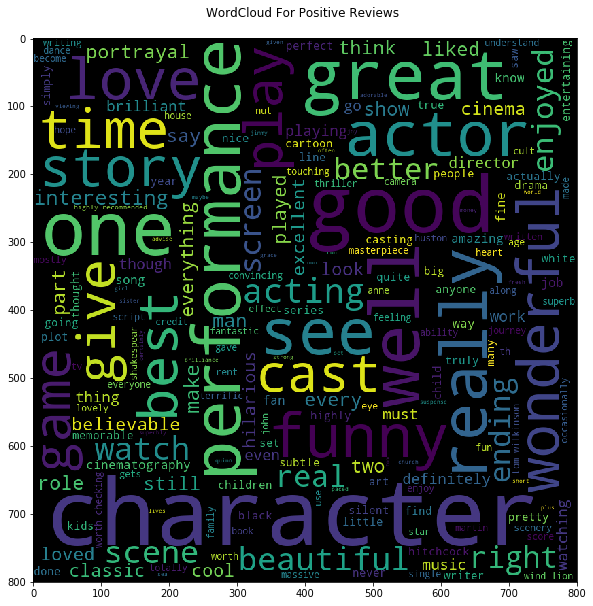

In [11]:
Pos=df[df['sentiments']==1]
Pos_Token=list()
for i in Pos['clean_text']:
    if 'movi' in i or 'film' in i:
        pass
    else:
        Pos_Token=Pos_Token+i.split(" ")
Pos_Corpus=" ".join(Pos_Token)
wordcloud=WordCloud(height=800,width=800,background_color='black').generate(Pos_Corpus)

plt.figure(figsize=(15,10))
plt.title("WordCloud For Positive Reviews \n")
plt.imshow(wordcloud)
plt.show()

### Highly used words in Positive reviews: ###
 1.good<br>
 2.great<br>
 3.love<br>
 4.well<br>
 5.character<br>
 6.wonderful<br>
 7.funny

## GloVe##

In [44]:
glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="Vect.txt")
model=KeyedVectors.load_word2vec_format("Vect.txt")

## summing vectors for text-reviews##
### Not-Normalized###

In [45]:
Def_List=[0]*50   #those factors which donot have value in glove are assigned 0
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    return vec[ret_val]
Not_Norm=df
for i in range(50):
    Not_Norm['Feat'+str(i)]=Not_Norm['clean_text'].apply(Get_Sum,args=[Def_List,i])
Not_Norm

,Reviews,sentiments,clean_tweet,Tweet_length,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,...,Feat40,Feat41,Feat42,Feat43,Feat44,Feat45,Feat46,Feat47,Feat48,Feat49
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,8,-4.197564,38.599630,26.597819,28.773070,12.019606,-2.796592,...,30.318663,1.836787,-3.325347,-6.426317,-5.427331,13.666963,7.766495,-18.603126,12.761814,33.949570
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,8,-5.360641,29.964580,25.472774,26.135550,17.642156,5.047866,...,29.368261,4.551691,-12.723127,-0.664520,-4.105170,13.336035,8.802163,-10.968968,11.866485,37.856241
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,19,-7.471877,79.155031,61.863741,63.561971,39.114575,2.377331,...,76.863811,6.774646,-22.014274,4.026643,-7.272920,29.995502,19.717337,-39.834401,35.024002,78.983641
3,Very little music or anything to speak of.,0,littl music anyth speak,4,-2.429580,15.870500,14.719219,13.581720,10.725060,-0.731814,...,13.393341,-1.855404,-4.418319,0.518827,-2.197795,2.092962,4.294747,-7.061218,7.199637,14.522490
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,10,-1.437613,34.956560,30.285034,29.842580,11.505750,-0.170489,...,35.921137,7.672367,-9.201550,-2.447553,-4.848333,16.939742,8.625989,-18.055855,11.998434,47.643901
5,"The rest of the movie lacks art, charm, meanin...",0,rest movi lack art charm mean empti work guess...,10,-5.060242,38.760730,33.436864,31.293670,17.010846,-0.254305,...,33.400127,2.603767,-8.038705,4.060161,-5.060063,10.819471,10.451813,-17.977619,11.043360,35.109611
6,Wasted two hours.,0,wast two hour,3,-3.584252,10.919480,7.789400,9.762280,3.454532,-1.329416,...,9.224060,0.055057,-2.907110,-0.598535,0.706075,2.672833,0.873195,-5.630909,4.908394,10.047060
7,Saw the movie today and thought it was a good ...,1,saw movi today thought good effort good messag...,9,-5.467158,40.594550,23.561252,32.991340,12.499276,-1.606365,...,32.654571,2.333391,-4.758278,-7.465787,-1.629105,11.714942,6.249578,-21.907967,15.215990,43.951050
8,A bit predictable.,0,bit predict,2,-1.285620,5.728420,6.434684,5.696250,3.806140,1.092314,...,6.712511,2.265684,-2.315596,2.134150,0.283873,4.382250,1.634295,-4.479380,1.639536,11.603790
9,Loved the casting of Jimmy Buffet as the scien...,1,love cast jimmi buffet scienc teacher,6,-3.294901,24.283650,21.559984,21.486170,12.660110,-4.279647,...,28.479577,2.939434,-2.515512,0.627667,-2.952827,11.990213,6.492439,-13.737908,9.483167,25.999710


### Normalized ###

In [46]:
Def_List=[0]*50
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    vec=np.divide(vec,len(vec))
    return vec[ret_val]

Norm=df
for i in range(50):
    Norm['Feat'+str(i)]=Not_Norm['clean_text'].apply(Get_Sum,args=[Def_List,i])
Norm

,Reviews,sentiments,clean_tweet,Tweet_length,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,...,Feat40,Feat41,Feat42,Feat43,Feat44,Feat45,Feat46,Feat47,Feat48,Feat49
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,8,-0.083951,0.771993,0.531956,0.575461,0.240392,-0.055932,...,0.606373,0.036736,-0.066507,-0.128526,-0.108547,0.273339,0.155330,-0.372063,0.255236,0.678991
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,8,-0.107213,0.599292,0.509455,0.522711,0.352843,0.100957,...,0.587365,0.091034,-0.254463,-0.013290,-0.082103,0.266721,0.176043,-0.219379,0.237330,0.757125
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,19,-0.149438,1.583101,1.237275,1.271239,0.782292,0.047547,...,1.537276,0.135493,-0.440285,0.080533,-0.145458,0.599910,0.394347,-0.796688,0.700480,1.579673
3,Very little music or anything to speak of.,0,littl music anyth speak,4,-0.048592,0.317410,0.294384,0.271634,0.214501,-0.014636,...,0.267867,-0.037108,-0.088366,0.010377,-0.043956,0.041859,0.085895,-0.141224,0.143993,0.290450
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,10,-0.028752,0.699131,0.605701,0.596852,0.230115,-0.003410,...,0.718423,0.153447,-0.184031,-0.048951,-0.096967,0.338795,0.172520,-0.361117,0.239969,0.952878
5,"The rest of the movie lacks art, charm, meanin...",0,rest movi lack art charm mean empti work guess...,10,-0.101205,0.775215,0.668737,0.625873,0.340217,-0.005086,...,0.668003,0.052075,-0.160774,0.081203,-0.101201,0.216389,0.209036,-0.359552,0.220867,0.702192
6,Wasted two hours.,0,wast two hour,3,-0.071685,0.218390,0.155788,0.195246,0.069091,-0.026588,...,0.184481,0.001101,-0.058142,-0.011971,0.014121,0.053457,0.017464,-0.112618,0.098168,0.200941
7,Saw the movie today and thought it was a good ...,1,saw movi today thought good effort good messag...,9,-0.109343,0.811891,0.471225,0.659827,0.249986,-0.032127,...,0.653091,0.046668,-0.095166,-0.149316,-0.032582,0.234299,0.124992,-0.438159,0.304320,0.879021
8,A bit predictable.,0,bit predict,2,-0.025712,0.114568,0.128694,0.113925,0.076123,0.021846,...,0.134250,0.045314,-0.046312,0.042683,0.005677,0.087645,0.032686,-0.089588,0.032791,0.232076
9,Loved the casting of Jimmy Buffet as the scien...,1,love cast jimmi buffet scienc teacher,6,-0.065898,0.485673,0.431200,0.429723,0.253202,-0.085593,...,0.569592,0.058789,-0.050310,0.012553,-0.059057,0.239804,0.129849,-0.274758,0.189663,0.519994


### Preparing data for Training ##

In [47]:
Norm=Norm.drop(['Reviews','clean_text','Text_len'],axis=1) # normalized
Not_Norm=Not_Norm.drop(['Reviews','clean_text','Text_len'],axis=1) #not-normalized

### Y-Label ###

In [48]:
Y_Norm = df['sentiments']
Y_Not_Norm = df['sentiments']

In [49]:
Norm=Norm.drop(['sentiments'],axis=1)
Not_Norm=Not_Norm.drop(['sentiments'],axis=1)

### Training using different kinds of Algorithm and Testing (by finding accuracy score and f1_score)  ###

In [50]:
X_Train_Not_Norm,X_Test_Not_Norm,Y_Train_Not_Norm,Y_Test_Not_Norm=train_test_split(Not_Norm,Y_Not_Norm,test_size=0.2,
                                                                                   random_state=1) # not-normalized

In [51]:
X_Train_Norm,X_Test_Norm,Y_Train_Norm,Y_Test_Norm=train_test_split(Norm,Y_Norm,test_size=0.2,
                                                                                   random_state=1) # normalized

## Not-Normalized ##

## Logistic Regression ##

In [68]:
lg = LogisticRegression()
lg.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
predict = lg.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))

Accuracy : 59.50 %
F1-Score : 0.54 


## Hyperparameter tuning ##

In [121]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
clf.best_estimator_.C

1000

### after tuning ###

In [128]:
lg = LogisticRegression(C=1000)
lg.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
predict = lg.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(predict,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(predict,Y_Test_Not_Norm)))
f1 = accuracy_score(predict,Y_Test_Not_Norm)

Accuracy : 61.50 %
F1-Score : 0.57 


### both accurcy score and f1_score increases###
## Naive Bayes ##

In [126]:
Nb=GaussianNB()
Nb.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Nb.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))
f2=accuracy_score(Pred,Y_Test_Not_Norm)

Accuracy : 57.50 %
F1-Score : 0.42 


## SVM ##

In [74]:
sv = SVC()
sv.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
pred = sv.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(pred,Y_Test_Not_Norm)))


Accuracy : 55.50 %
F1-Score : 0.44 


## Hyperparameter tuning##

In [72]:
Cs =[0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
grid_search.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1}

## after tuning ##

In [125]:
sv = SVC(C=0.1)
sv.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
pred = sv.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(pred,Y_Test_Not_Norm)))
f3 = accuracy_score(pred,Y_Test_Not_Norm)

Accuracy : 56.00 %
F1-Score : 0.41 


### both accurcy score and f1_score increases###

## Random Forest ##

In [76]:
Rfc=RandomForestClassifier(random_state=12)
Rfc.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Rfc.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))

Accuracy : 59.50 %
F1-Score : 0.54 


## Hyperparameter tuning##

In [ ]:
rf_params = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(5,15,1)
}

gs_random = GridSearchCV(estimator=rf, param_grid=rf_params, cv= 5)
gs_random.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
print (gs_random.best_params_)

## after tuning ##

In [124]:
Rfc=RandomForestClassifier(random_state=100,max_depth= 11, max_features='auto', n_estimators= 200)
Rfc.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Rfc.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))
f4 = accuracy_score(Pred,Y_Test_Not_Norm)

Accuracy : 63.00 %
F1-Score : 0.61 


### both accurcy score and f1_score increases###

## Normalized ##

## Logistic Regression##

In [83]:
LG = LogisticRegression()
LG.fit(X_Train_Norm,Y_Train_Norm)
PredicT = LG.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PredicT,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PredicT,Y_Test_Norm)))


Accuracy : 58.50 %
F1-Score : 0.55 


## Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_Train_Norm, Y_Train_Norm)
clf.best_estimator_.C

1000

## After Tuning

In [146]:
LG1 = LogisticRegression(C=1000)
LG1.fit(X_Train_Norm,Y_Train_Norm)
PrediCT = LG1.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PrediCT,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PrediCT,Y_Test_Norm)))
F1=accuracy_score(PrediCT,Y_Test_Norm)

Accuracy : 61.50 %
F1-Score : 0.57 


 ### both accuracy score and f1_score increases

## Naive-Bayes

In [142]:
NB=GaussianNB()
NB.fit(X_Train_Norm,Y_Train_Norm)
PRED=NB.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PRED,Y_Test_Norm)))
F2 = accuracy_score(Pred,Y_Test_Norm)

Accuracy : 57.50 %
F1-Score : 0.42 


## SVM

In [80]:
SV = SVC()
SV.fit(X_Train_Norm,Y_Train_Norm)
PRed = SV.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PRed,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PRed,Y_Test_Norm)))

Accuracy : 55.50 %
F1-Score : 0.44 


## Hyperparameter Tuning

In [81]:
Cs =[0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
grid_search.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1}

## After Tuning

In [143]:
SV = SVC(C=0.1)
SV.fit(X_Train_Norm,Y_Train_Norm)
PRed = SV.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PRed,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PRed,Y_Test_Norm)))
F3 = accuracy_score(PRed,Y_Test_Norm)

Accuracy : 56.00 %
F1-Score : 0.41 


## Accuracy score and f1_score increases

## Random Forest##

In [87]:
Rf = RandomForestClassifier(random_state=10)
Rf.fit(X_Train_Norm,Y_Train_Norm)
PREdict = Rf.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PREdict,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PREdict,Y_Test_Norm)))

Accuracy : 54.00 %
F1-Score : 0.42 


## Hyperparameter tuning

In [ ]:
rf_params = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(5,15,1)
}

gs_random = GridSearchCV(estimator=Rf, param_grid=rf_params, cv= 5)
gs_random.fit(X_Train_Norm, Y_Train_Norm)
print (gs_random.best_params_)


## After Tuning

In [144]:
Rf1 = RandomForestClassifier(random_state=100,max_depth= 12, max_features= 'log2', n_estimators= 200)
Rf1.fit(X_Train_Norm,Y_Train_Norm)
PREDict = Rf1.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PREDict,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PREDict,Y_Test_Norm)))
F4 = accuracy_score(PREDict,Y_Test_Norm)

Accuracy : 62.00 %
F1-Score : 0.60 


### there is an increase in accuracy score and f1-score

## for Not-Normalized data

In [140]:
Accuracy = [f1,f2,f3,f4]

Algo = ['LogisticRegression','GaussianNB','SVM(rbf)','Random Forest']


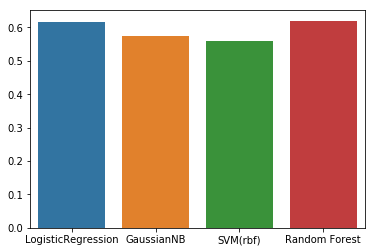

In [149]:
sns.barplot(y=Accuracy,x=Algo,data=df)

## for Normalized data

In [147]:
Accuracy = [F1,F2,F3,F4]

Algo = ['LogisticRegression','GaussianNB','SVM(rbf)','Random Forest']

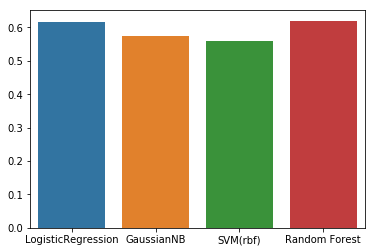

In [150]:
sns.barplot(x=Algo,y=Accuracy)